In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os


In [9]:
z_no_stim_stim = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/ztc_nostimstim.npz')

In [12]:
z_no_stim_clusts = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/ztc_nostimclusts.npz')

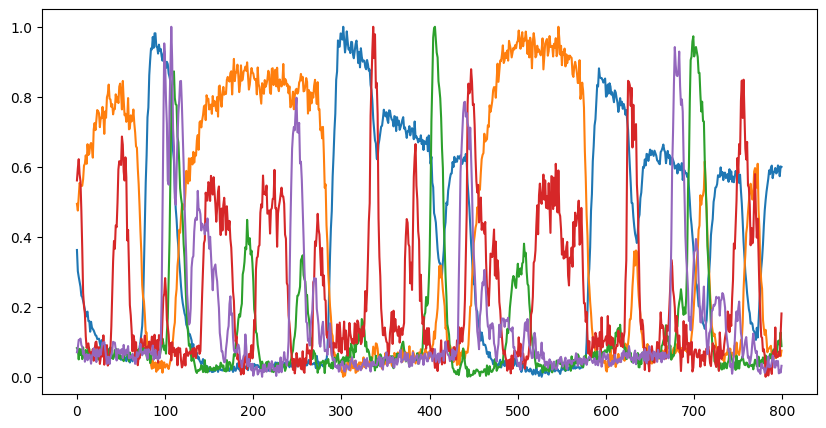

In [15]:
fig, ax = plt.subplots( figsize=(10, 5))
ax.plot(z_no_stim_clusts['arr_0'])



In [10]:
z_no_stim_stim['arr_0'].shape

(800,)

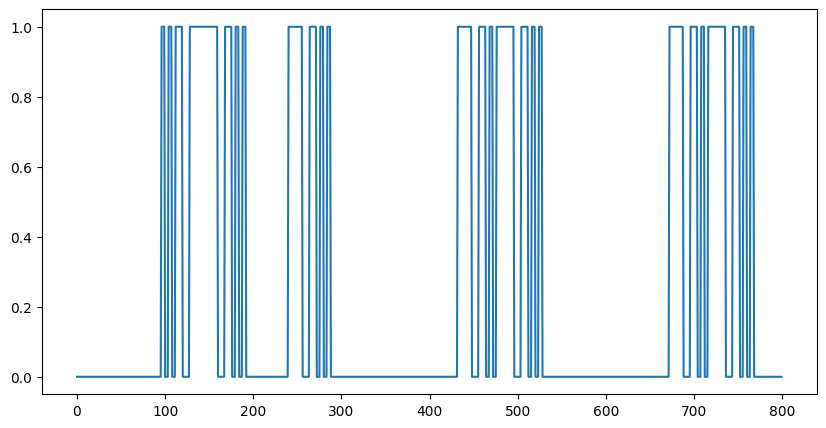

In [11]:
fig, ax = plt.subplots( figsize=(10, 5))
ax.plot(z_no_stim_stim['arr_0'])

In [28]:
cont_w1 = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Buffer_control_data/2nonanone_10e-2_Worm1_Buffer.csv')

In [38]:
cont_w1.iloc[ : , 0]

0       155.439718
1       149.256159
2       146.684946
3       140.261786
4       127.768734
           ...    
1868      6.169982
1869      3.421523
1870      3.272842
1871      2.734342
1872      5.593580
Name: x2nonanone_10eneg2_Worm1_Neuron1, Length: 1873, dtype: float64

In [33]:
cont_w1.shape

(1873, 80)

In [40]:
scaler = MinMaxScaler()

In [41]:
for column in cont_w1.columns:
    cont_w1[column] = scaler.fit_transform(cont_w1[[column]])

In [44]:
cont_w1.iloc[: , 1]

0       0.096799
1       0.083034
2       0.091614
3       0.066794
4       0.105894
          ...   
1868    0.046909
1869    0.048645
1870    0.066366
1871    0.062237
1872    0.073451
Name: x2nonanone_10eneg2_Worm1_Neuron2, Length: 1873, dtype: float64

In [45]:
%store cont_w1

Stored 'cont_w1' (DataFrame)


In [ ]:
#do the same procedure for the other worms
cont_w2 = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Buffer_control_data/2nonanone_10e-2_Worm2_Buffer.csv')
for column in cont_w2.columns:
    cont_w2[column] = scaler.fit_transform(cont_w2[[column]])
cont_w3 = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Buffer_control_data/2nonanone_10e-2_Worm3_Buffer.csv')
for column in cont_w3.columns:
    cont_w3[column] = scaler.fit_transform(cont_w3[[column]])




In [47]:
buffers = '/Users/iuliarusu/Documents/Sharpee/Buffer_control_data/'

# Initialize the scaler
scaler = MinMaxScaler()

# Dictionary to hold the DataFrames
buffer_dataframes = {}

# List all files in the directory
for filename in os.listdir(buffers):
    if filename.endswith('.csv'):
        # Full path to the file
        file_path = os.path.join(buffers, filename)
        
        # Extract a name to use as a key
        key = filename.split('.')[0]  # This takes the filename without the extension

        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Scale each column
        for column in df.columns:
            df[column] = scaler.fit_transform(df[[column]])
        
        buffer_dataframes[key] = df

In [48]:
%store buffer_dataframes

Stored 'buffer_dataframes' (dict)


In [2]:
%store -r buffer_dataframes

In [4]:
buffer_dataframes.keys()

dict_keys(['2nonanone_10e-2_Worm1_Buffer', 'Diacetyl_10e-5_Worm2_Buffer', 'IAA_10e-6_Worm3_Buffer', 'NaCl_200mM_Worm3_Buffer', 'Benzaldehyde_10e-3_Worm2_Buffer', 'Diacetyl_10e-7_Worm3_Buffer', 'IAA_10e-4_Worm2_Buffer', 'NaCl_600mM_Worm1_Buffer', 'IAA_10e-6_Worm1_Buffer', '2nonanone_10e-4_Worm2_Buffer', '2nonanone_10e-2_Worm3_Buffer', 'Benzaldehyde_10e-6_Worm2_Buffer', 'NaCl_200mM_Worm1_Buffer', 'NaCl_600mM_Worm3_Buffer', 'Diacetyl_10e-7_Worm1_Buffer', 'NaCl_200mM_Worm2_Buffer', 'Benzaldehyde_10e-3_Worm3_Buffer', 'Diacetyl_10e-7_Worm2_Buffer', 'IAA_10e-4_Worm3_Buffer', '2nonanone_10e-4_Worm1_Buffer', 'Diacetyl_10e-5_Worm3_Buffer', 'IAA_10e-6_Worm2_Buffer', 'Benzaldehyde_10e-6_Worm1_Buffer', 'Benzaldehyde_10e-3_Worm1_Buffer', 'NaCl_600mM_Worm2_Buffer', 'IAA_10e-4_Worm1_Buffer', 'Diacetyl_10e-5_Worm1_Buffer', '2nonanone_10e-4_Worm3_Buffer', '2nonanone_10e-2_Worm2_Buffer', 'Benzaldehyde_10e-6_Worm3_Buffer'])